In [1]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [3]:
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [4]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [5]:
pipe = pipeline(
    "image-to-text",
    model=model_id,
    model_kwargs={"quantization_config": quant_config}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [6]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS

In [7]:
image_path = "image.jpg"

In [8]:
from PIL import Image
image = Image.open((image_path))

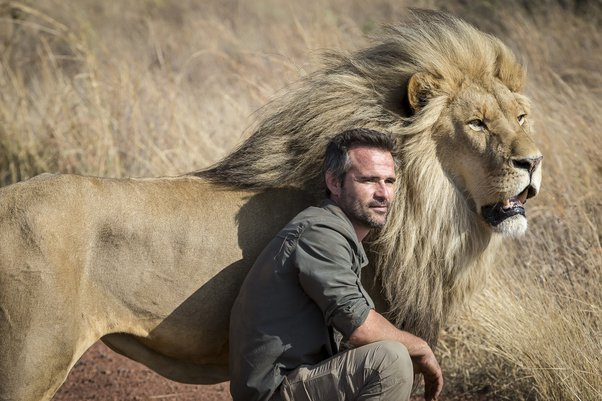

In [9]:
image

In [10]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
max_new_tokens = 250

In [12]:
prompt_instructions = """
Describe the image using as much as detail as possible.
You are a helpful AI assistant who is able to answer any questions about the image.
What is this iamge all about?
Now generate the helpful answer.
"""

In [13]:
prompt = "User: <image>\n" + prompt_instructions + "\nAssistant:"

In [14]:
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":max_new_tokens})

In [15]:
outputs[0]['generated_text']

'User:  \n\nDescribe the image using as much as detail as possible.\nYou are a helpful AI assistant who is able to answer any questions about the image.\nWhat is this iamge all about?\nNow generate the helpful answer.\n\nAssistant: The image features a man sitting on the ground next to a large lion. The man appears to be enjoying the company of the lion, which is standing close to him. The scene takes place in a natural environment, possibly in the wild. The man and the lion seem to be sharing a moment of connection and appreciation for the beauty of nature.'

In [16]:
for sent in sent_tokenize(outputs[0]['generated_text']):
  print(sent)

User:  

Describe the image using as much as detail as possible.
You are a helpful AI assistant who is able to answer any questions about the image.
What is this iamge all about?
Now generate the helpful answer.
Assistant: The image features a man sitting on the ground next to a large lion.
The man appears to be enjoying the company of the lion, which is standing close to him.
The scene takes place in a natural environment, possibly in the wild.
The man and the lion seem to be sharing a moment of connection and appreciation for the beauty of nature.


In [17]:
warnings.filterwarnings("ignore")

In [18]:
import numpy as np

In [19]:
torch.cuda.is_available()

True

In [20]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
print("Using torch {0} {1}".format(torch.__version__, DEVICE))

Using torch 2.2.1+cu121 cuda


In [22]:
import whisper

In [23]:
model = whisper.load_model("medium", device=DEVICE)

100%|██████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 118MiB/s]


In [24]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

Model is multilingual and has 762,321,920 parameters.


In [25]:
import re
import datetime

In [26]:
# Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ", "_")
logfile = f"log_{tstamp}.txt"

In [27]:
def writehistory(text):
  with open(logfile, "a", encoding="utf-8") as f:
    f.write(text)
    f.write("\n")
  f.close()

In [28]:
import requests

In [29]:
def img2txt(input_text, input_image):

    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much as detail as possible.
        You are a helpful AI assistant who is able to answer any questions about the image.
        What is this iamge all about?
        Now generate the helpful answer.
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":200})

    # Extracting response text
    if outputs is not None and len(outputs[0]['generated_text']) > 0:
      match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]['generated_text'])
      if match:
        # Extract text after ASSISTANT
        reply = match.group(1)
      else:
        reply = "No response found"

    else:
      reply = "No response generated"

    return reply


In [30]:
def transcribe(audio):
  if audio is None or audio == '':
    # Return empty strings and None audio file
    return ('','', None)

  audio = whisper.load_audio(audio)
  audio = whisper.pad_or_trim(audio)

  mel = whisper.log_mel_spectrogram(audio).to(model.device)

  _, probs = model.detect_language(mel)
  print(f"Detected language: {max(probs, key=probs.get)}")

  # Decode the audio
  options = whisper.DecodingOptions()
  result = whisper.decode(model, mel, options)
  result_text = result.text

  return result_text

In [31]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [32]:
import locale
print(locale.getlocale())

('en_US', 'UTF-8')


In [33]:
locale.getpreferredencoding = lambda: "UTF-8"

In [34]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [35]:
import gradio as gr
import base64
import os

In [36]:
# Function to handle audio and image inputs
def process_inputs(audio_path, image_path):

    speech_to_text_output = transcribe(audio_path)

    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Speak with Images using Llava and Whisper LLM",
    description="Upload an image and interact via voice input and get an audio response."
)

iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ed6f5fa3b78bb5fd2f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Detected language: en
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ed6f5fa3b78bb5fd2f.gradio.live
